In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

In [3]:
results_dir = Path("results")

In [18]:
df = pd.read_csv(results_dir / "reg_results.csv")

In [19]:
# Select rows with EXP_REG in Name
df = df[df["Name"].str.contains("EXP_REG")][:120]

In [58]:
df.head()

,Name,State,Commit,Runtime,GitHub,Hostname,Notes,Tags,batch_size,data.prediction_channels,...,TRAIN_DATA_METRICS.pcorr_unscaled__ch_21,TRAIN_DATA_METRICS.pcorr_unscaled__ch_22,TRAIN_DATA_METRICS.pcorr_unscaled__ch_23,TRAIN_DATA_METRICS.pcorr_unscaled__ch_24,TRAIN_DATA_METRICS.pcorr_unscaled__ch_25,TRAIN_DATA_METRICS.pcorr_unscaled__ch_26,architecture,subseq_len,loss_function,run
0,EXP_REG_SingleLSTM_20_mae_27_RUN_5,finished,603886927f76cf6c22d0e1dff660d058b0a81a3c,2402,https://github.com/JankowskiDaniel/Neural-Deep...,hgx1,-,NaN,4096.0,all,...,0.482663,0.087046,0.493069,0.167359,0.495641,-0.007721,SingleLSTM,20,mae,5
1,EXP_REG_SingleLSTM_20_mae_27_RUN_4,finished,603886927f76cf6c22d0e1dff660d058b0a81a3c,2195,https://github.com/JankowskiDaniel/Neural-Deep...,hgx2,-,NaN,4096.0,all,...,0.481665,0.080189,0.474428,0.182725,0.490455,-0.008359,SingleLSTM,20,mae,4
2,EXP_REG_SingleLSTM_20_mae_27_RUN_3,finished,603886927f76cf6c22d0e1dff660d058b0a81a3c,798,https://github.com/JankowskiDaniel/Neural-Deep...,hgx1,-,NaN,4096.0,all,...,0.353693,0.089752,0.326199,0.164383,0.344787,-0.002232,SingleLSTM,20,mae,3
3,EXP_REG_SingleLSTM_20_mae_27_RUN_2,finished,603886927f76cf6c22d0e1dff660d058b0a81a3c,2292,https://github.com/JankowskiDaniel/Neural-Deep...,hgx1,-,NaN,4096.0,all,...,0.478759,0.073372,0.480750,0.172107,0.482422,-0.005957,SingleLSTM,20,mae,2
4,EXP_REG_SingleLSTM_20_mae_27_RUN_1,finished,603886927f76cf6c22d0e1dff660d058b0a81a3c,2466,https://github.com/JankowskiDaniel/Neural-Deep...,hgx1,-,NaN,4096.0,all,...,0.496791,0.080416,0.490456,0.157239,0.506437,-0.011001,SingleLSTM,20,mae,1


WANDB naming:

EXP_{REG/CURR/CLASS}_{ARCH}_{WINDOW}_{LOSS}_{DATASET}_RUN_{i}

In [22]:
# Create columns based on Name
df["architecture"] = df["Name"].str.split("_").str[2]
df["subseq_len"] = df["Name"].str.split("_").str[3].astype(int)
df["loss_function"] = df["Name"].str.split("_").str[4]
df["num_units"] = df["Name"].str.split("_").str[5].astype(int)
df["run"] = df["Name"].str.split("_").str[7].astype(int)

In [29]:
stat_columns = [
    "TEST_DATA_METRICS.pcorr_unscaled_mean",
    "TEST_DATA_METRICS.emd_unscaled_mean",
    "model.total_trainable_params",
    "training/total_time",
]

In [30]:
# Group by architecture, subseq_len, loss_function, num_units

grouped = (
    df.groupby(["architecture", "subseq_len", "loss_function", "num_units"])[
        stat_columns
    ]
    .agg(["mean", "std"])
    .reset_index()
)

In [56]:
grouped.head()

,architecture,subseq_len,loss_function,TEST_DATA_METRICS.pcorr_unscaled_mean,TEST_DATA_METRICS.emd_unscaled_mean,model.total_trainable_params,training/total_time,conf
0,SimpleCFC,20,mae,0.204245,2.177255,44616.0,1638.658655,SimpleCFC_20_mae
1,SimpleCFC,20,mse,0.388322,1.383541,44616.0,867.079142,SimpleCFC_20_mse
2,SimpleCFC,40,mae,0.182216,2.190649,47496.0,2440.556123,SimpleCFC_40_mae
3,SimpleCFC,40,mse,0.423440,1.242339,47496.0,1259.813427,SimpleCFC_40_mse
4,SingleLSTM,20,mae,0.173688,2.376105,43881.0,1434.798189,SingleLSTM_20_mae


Compare models for the data set with 9 units

In [45]:
grouped = (
    df[df["num_units"] == 9]
    .groupby(["architecture", "subseq_len", "loss_function"])[stat_columns]
    .agg("mean")
    .reset_index()
)

In [46]:
grouped["conf"] = (
    grouped["architecture"].astype(str)
    + "_"
    + grouped["subseq_len"].astype(str)
    + "_"
    + grouped["loss_function"].astype(str)
)

In [47]:
grouped

,architecture,subseq_len,loss_function,TEST_DATA_METRICS.pcorr_unscaled_mean,TEST_DATA_METRICS.emd_unscaled_mean,model.total_trainable_params,training/total_time,conf
0,SimpleCFC,20,mae,0.204245,2.177255,44616.0,1638.658655,SimpleCFC_20_mae
1,SimpleCFC,20,mse,0.388322,1.383541,44616.0,867.079142,SimpleCFC_20_mse
2,SimpleCFC,40,mae,0.182216,2.190649,47496.0,2440.556123,SimpleCFC_40_mae
3,SimpleCFC,40,mse,0.423440,1.242339,47496.0,1259.813427,SimpleCFC_40_mse
4,SingleLSTM,20,mae,0.173688,2.376105,43881.0,1434.798189,SingleLSTM_20_mae
5,SingleLSTM,20,mse,0.394391,2.139573,43881.0,1948.326963,SingleLSTM_20_mse
6,SingleLSTM,40,mae,0.137270,2.388893,46761.0,1601.589046,SingleLSTM_40_mae
7,SingleLSTM,40,mse,0.411071,2.166220,46761.0,2925.490180,SingleLSTM_40_mse


/var/folders/cp/w6zb81516yz3b7dw7m2sgt_80000gn/T/ipykernel_50625/2456575664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


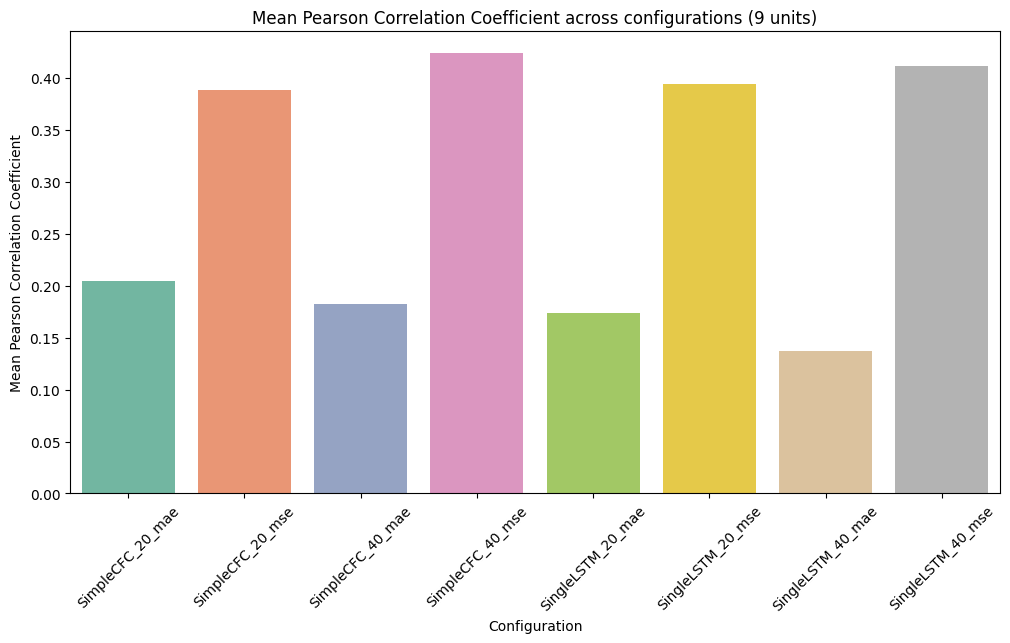

In [55]:
# Plot bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x="conf",
    y="TEST_DATA_METRICS.pcorr_unscaled_mean",
    palette="Set2",
)
plt.title("Mean Pearson Correlation Coefficient across configurations (9 units)")
plt.xlabel("Configuration")
plt.ylabel("Mean Pearson Correlation Coefficient")
plt.xticks(rotation=45)
plt.show()